In [1]:
# Step 1: Load dataset, split into training and test sets, and scale features
import numpy as np
from sklearn.datasets import load_boston
np.random.seed(12345)

# load boston housing price dataset
boston = load_boston()
x = boston.data
y = boston.target

# split into training and test sets, namely 80 percent of examples goes for the training, 20 percent goes for the test set
N_train = int(0.8 * x.shape[0])
x_train = x[:N_train,:]
y_train = y[:N_train]
x_test = x[N_train:,:]
y_test = y[N_train:]
# scale features by removing mean and dividing by the standard deviation
x_bar = np.mean(x_train,axis=0)
x_std = np.std(x_train,axis=0)
x_train_scaled = (x_train - x_bar)/x_std
x_test_scaled = (x_test - x_bar)/x_std

print(x_train_scaled.shape)
print(y_train.shape)
print(x_test_scaled.shape)
print(y_test.shape)

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.
(404, 13)
(404,)
(102, 13)
(102,)


/home/gc/miniconda3/envs/python3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Cal

In [2]:
# Step 2: Add intercept terms and initialize parameters
# Note: If you run this step again, please run from step 1 because notebook keeps the value from the previous run
intercept_train = np.ones((N_train,1))
x_train_scaled = np.hstack((intercept_train,x_train_scaled))

intercept_test = np.ones((x.shape[0] - N_train,1))
x_test_scaled = np.hstack((intercept_test,x_test_scaled))

print(x_train_scaled.shape)
print(x_test_scaled.shape)

# init parameters using random values
theta = 0.5 * np.random.randn(x_train_scaled.shape[1])
print(theta)

(404, 14)
(102, 14)
[-0.10235383  0.23947167 -0.25971936 -0.27786515  0.98289029  0.69670292
  0.04645394  0.14087308  0.38451128  0.62321737  0.50359468 -0.64811055
  0.13749582  0.11445644]


In [3]:
# Step 3: Implement the gradient and the cost function
# In this step, you have to calculate the gradient. You can use the provided formula but the best way is to vectorize
# that formula for efficiency
def compute_gradient(x,y,theta):
    n = len(x)
    return (1.0/n)*np.dot(x.T,(np.dot(x,theta) - y))

def compute_cost(x,y,theta):
    n = len(x)
    return (0.5/n)*np.sum((np.dot(x,theta) - y)**2)

print(compute_cost(x_train_scaled,y_train,theta))
print(compute_gradient(x_train_scaled,y_train,theta))

340.9246008995324
[-24.2780964    3.72288879  -3.37162772   4.47619612  -0.12175773
   4.27232712  -7.09578545   3.64493635  -2.09115506   3.46538031
   4.4263513    3.8630858   -1.52365903   7.21932641]


training cost: 11.671567


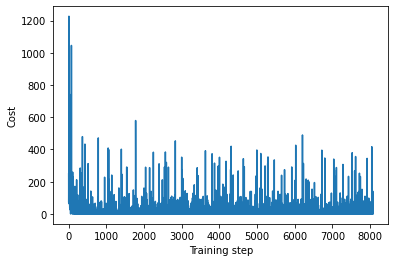

In [4]:
# Step 4: stochastic gradient descent
import matplotlib.pyplot as plt
import copy

# try different values for the learning rate
learning_rate = 0.01

# number of training iterations
num_samples = x_train_scaled.shape[0]
N_iterations = num_samples * 20 # 20 times the number of training samples

# prepare to plot
plt.subplot(111)

# calculate cost value and update theta
J = np.zeros(N_iterations)

# initialize new parameters using random distribution
theta_sgd = 0.5 * np.random.randn(x_train_scaled.shape[1])

for step in range(N_iterations):
    if step % num_samples == 0:
        # shuffle the training data (must be done the same way for data and targets)
        # YOUR CODE GOES HERE
        indices = np.random.permutation(num_samples)
        x_train_scaled = x_train_scaled[indices,:]
        y_train = y_train[indices]

    # select the next sample to train
    x_step = x_train_scaled[step%num_samples] # YOUR CODE GOES HERE
    y_step = y_train[step%num_samples] # YOUR CODE GOES HERE
    x_step = x_step.reshape([1,-1])
    
    # calculate the cost on x_step and y_step
    J[step] = compute_cost(x_step,y_step,theta_sgd) # YOUR CODE GOES HERE
    # print('%d: %f' %(step, J[step]))
    # update theta using a x_step and y_step
    theta_sgd = theta_sgd - learning_rate * compute_gradient(x_step,y_step,theta_sgd) # YOUR CODE GOES HERE

# calculate the loss on the whole training set 
J_train = compute_cost(x_train_scaled, y_train, theta_sgd) # YOUR CODE GOES HERE
print('training cost: %f' %J_train)
# plot cost function
plt.plot(J)
plt.xlabel('Training step')
plt.ylabel('Cost')
plt.show()

test cost:  13.839133020005663


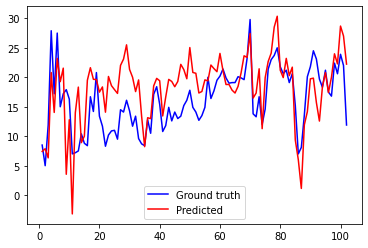

In [5]:
# Step 5
# Predict the price of house
predict_price = np.dot(x_test_scaled,theta_sgd)

# calculate the cost for the test set
test_cost = compute_cost(x_test_scaled,y_test,theta_sgd)
print('test cost: ',test_cost)

# plot the ground truth and the predicted
x_axis = np.linspace(1,len(y_test),len(y_test))
plt.plot(x_axis,y_test,'b',x_axis,predict_price,'r')
plt.legend(('Ground truth','Predicted'))
plt.show()

training cost: 11.980376


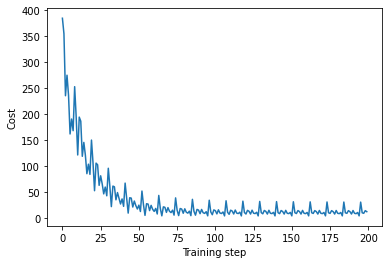

In [6]:
# Step 6: mini-batch gradient descent
import matplotlib.pyplot as plt
import copy

# try different values for the learning rate
learning_rate = 0.03

# number of training iterations
num_samples = x_train_scaled.shape[0]
batch_size = int(num_samples/10)
N_iterations = int(num_samples / batch_size) * 20  # 20 times the number of training samples

# prepare to plot
plt.subplot(111)

# keep the cost value for each training step
J = np.zeros(N_iterations)

# initialize new parameters using random distribution
theta_msgd = 0.5 * np.random.randn(x_train_scaled.shape[1])

start = 0
end = 0
for step in range(N_iterations):
    if step % num_samples == 0:
        # shuffle the training data 
        # YOUR CODE GOES HERE
        indices = np.random.permutation(num_samples)
        x_train_scaled = x_train_scaled[indices,:]
        y_train = y_train[indices]

    # create a mini-batch of data to train on
    end = start + batch_size
    if end >= num_samples:
        end = num_samples
    x_batch = x_train_scaled[start:end,:] # YOUR CODE GOES HERE
    y_batch = y_train[start:end] # YOUR CODE GOES HERE
    start = 0 if end >= num_samples else end
   
    # calculate the cost on x_step and y_step
    J[step] = compute_cost(x_batch,y_batch,theta_msgd) # YOUR CODE GOES HERE
    
    # update theta_msgd using a x_step and y_step
    theta_msgd = theta_msgd - learning_rate * compute_gradient(x_batch,y_batch,theta_msgd) # YOUR CODE GOES HERE

# calculate the loss on the whole training set 
J_train = compute_cost(x_train_scaled, y_train, theta_msgd) # YOUR CODE GOES HERE
print('training cost: %f' %J_train)
# plot cost function
plt.plot(J)
plt.xlabel('Training step')
plt.ylabel('Cost')
plt.show()

test cost:  11.585019904110352


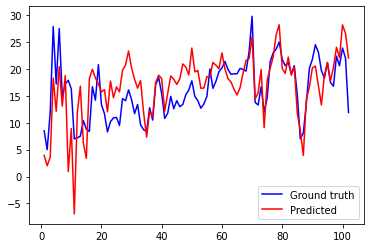

In [7]:
# Step 7
# Predict the price of house
predict_price = np.dot(x_test_scaled,theta_msgd)

# calculate the cost for the test set
test_cost = compute_cost(x_test_scaled,y_test,theta_msgd)
print('test cost: ',test_cost)

# plot the ground truth and the predicted
x_axis = np.linspace(1,len(y_test),len(y_test))
plt.plot(x_axis,y_test,'b',x_axis,predict_price,'r')
plt.legend(('Ground truth','Predicted'))
plt.show()